## Data Format and SHSR Visualization 

Seamless Hybrid Scan Reflectivity (SHSR) 

## Data Peeking 

Take a look at the provided data which is mostly about SHSR data and its coordinates. 

In [33]:
!conda info



     active environment : spyder-env
    active env location : /Users/siwu/anaconda3/envs/spyder-env
            shell level : 2
       user config file : /Users/siwu/.condarc
 populated config files : /Users/siwu/.condarc
          conda version : 23.7.4
    conda-build version : 3.26.1
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=arm64
                          __osx=14.1=0
                          __unix=0=0
       base environment : /Users/siwu/anaconda3  (writable)
      conda av data dir : /Users/siwu/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-arm64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-arm64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/siwu/anaconda3/pkgs
                          /Users/siwu/.conda/pkgs
       envs director

In [3]:
nc_path = "/Users/siwu/Documents/CS7980/tornado_project/comparative_analysis/torn_pred_updated/data/SHSRdata/torn/"
csv_file = "/Users/siwu/Documents/CS7980/tornado_project/comparative_analysis/torn_pred_updated/data/2021_torn.csv"  
import sys
import numpy as np
import pandas as pd
import xarray as xr 
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from pandas import DataFrame

index = 9
nc_file_path = nc_path + "{}.nc".format(index) 
xr_data = xr.open_dataset(nc_file_path )
csv_data = pd.read_csv(csv_file).iloc[index]
print("xr_data:")
print( xr_data, "\n" )
print("csv_data:")
print(csv_data, "\n")

xr_data:
<xarray.Dataset>
Dimensions:    (latitude: 46, longitude: 56, time: 19)
Coordinates:
  * latitude   (latitude) float64 33.86 33.85 33.84 33.83 ... 33.43 33.42 33.41
  * longitude  (longitude) float64 273.0 273.0 273.0 273.0 ... 273.5 273.5 273.5
  * time       (time) datetime64[ns] 2021-01-26T03:40:00 ... 2021-01-26T06:40:00
Data variables:
    SHSR       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2022-03-05T22:17:25 GRIB to CDM+CF via cfgrib-0.... 

csv_data:
om                619633
yr                  2021
mo                     1
dy                    25
date           1/25/2021
time            22:40:00
ts      1/25/21 22:40:00
tz                     3
st                    AL
slat             33.5965
slon            -86.8256
elat            

### Select the closest timeframe when tornado/hail/wind was happening ... 

Here is the code that we will use to select the closest timeframe ... 

In [4]:
from operator import itemgetter

# convert .nc data's time into hour-minute time ... 
for i in range(5):
    tmp = str(xr_data['time'][i].values)
    print(type(tmp),tmp)
    h, m = tmp[11:13], tmp[14:16]
    print(h, ":",m)
    
def time_diff( t1, t2, shift=6 ):  
    # the shift here means 
    (h1,m1), (h2,m2) = t1, t2 
    h2 = (h2+shift)%24 
    return abs( (h1-h2)*60 + m1-m2 ) 

tmp = str( csv_data["time"] )
if tmp[0] == "0":
    h = int(tmp[1])
else:
    h = int(tmp[:2])
m = int(tmp[3:5]) 

tmps = []
for i in range( len(xr_data['time']) ):
    tmp = str(xr_data['time'][i].values)
    if tmp[11] == "0":
        h_ = int(tmp[12])
    else:
        h_ = int(tmp[11])
    m_ = int(tmp[14:16])
    tmps.append( time_diff( [h_,m_], [h,m] ) ) 

index, element = min(enumerate(tmps), key=itemgetter(1))
print( index, element )

<class 'str'> 2021-01-26T03:40:00.000000000
03 : 40
<class 'str'> 2021-01-26T03:50:00.000000000
03 : 50
<class 'str'> 2021-01-26T04:00:00.000000000
04 : 00
<class 'str'> 2021-01-26T04:10:00.000000000
04 : 10
<class 'str'> 2021-01-26T04:20:00.000000000
04 : 20
6 0


In [5]:
test_data = [ [1,2,3], [4,5,6], [7,8,9] ]
test_data = np.asarray( test_data )
val = len(test_data [test_data>3] ) 
print( val )
tmp = xr_data["SHSR"][0].values
print( np.mean(tmp), np.max(tmp) )

6
3.5284162 54.5


### Old Version Code to read SHSR data which caused time shown wrongly ... 

In [6]:
# old version
net_data = Dataset( nc_file_path )
print(net_data.variables.keys())
 
for var in ['longitude', 'latitude', 'time']:
    data=net_data.variables[var][:].data
    print(var,data.shape)
    print( data[:5] )

dict_keys(['latitude', 'longitude', 'time', 'SHSR'])
longitude (56,)
[272.97499877 272.98499877 272.99499877 273.00499877 273.01499877]
latitude (46,)
[33.855 33.845 33.835 33.825 33.815]
time (19,)
[220 230 240 250 260]


In [7]:
for var in [ 'longitude', 'latitude', 'time', "SHSR" ]:
    print( var, xr_data[var].shape )
    # print( xr_data[var][0] )

# choose the time closest to the time listed in our index sheet 
print(xr_data['time'][0:12])    # the data is collected every ten min, and there is a 6h shift ... 

longitude (56,)
latitude (46,)
time (19,)
SHSR (19, 46, 56)
<xarray.DataArray 'time' (time: 12)>
array(['2021-01-26T03:40:00.000000000', '2021-01-26T03:50:00.000000000',
       '2021-01-26T04:00:00.000000000', '2021-01-26T04:10:00.000000000',
       '2021-01-26T04:20:00.000000000', '2021-01-26T04:30:00.000000000',
       '2021-01-26T04:40:00.000000000', '2021-01-26T04:50:00.000000000',
       '2021-01-26T05:00:00.000000000', '2021-01-26T05:10:00.000000000',
       '2021-01-26T05:20:00.000000000', '2021-01-26T05:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-01-26T03:40:00 ... 2021-01-26T05:30:00
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time


## Simple Visualization for SHSR 

Here, we examine one tornado type .nc file's SHSR data along with its coordinates. 

We use latitude and longitude as grid to draw SHSR data as a colormap at certain time within MRMS's collected timeframe.

In [8]:
import pygrib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [10]:
s_lat, s_lon, e_lat, e_lon = 32.632, -84.256, 33.0312, -83.7509 
buffer = 1
s_lat -= buffer
s_lon -= buffer
e_lat += buffer
e_lon += buffer
lats, lons = xr_data['latitude'], xr_data['longitude']
lon2d, lat2d = np.meshgrid(lons, lats)

### Some observations based on visualization 

As we want to focus on predicting tornado, here we visualize SHSR data at different time and observe tornado's typical patterns/rules shown in SHSR

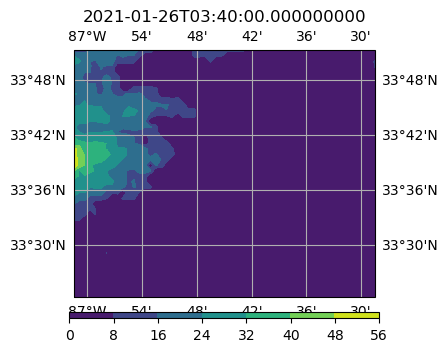

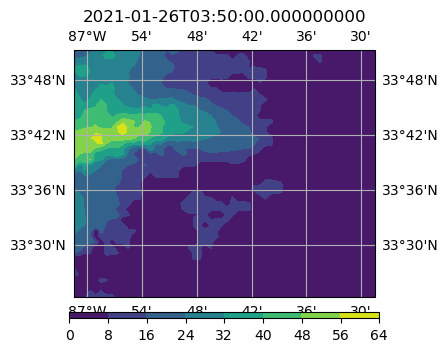

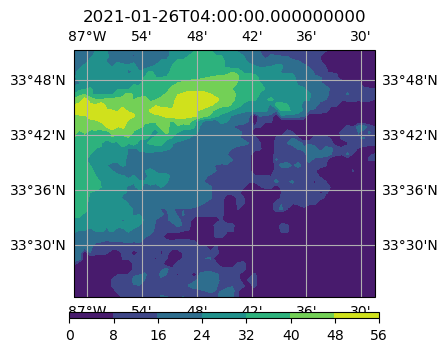

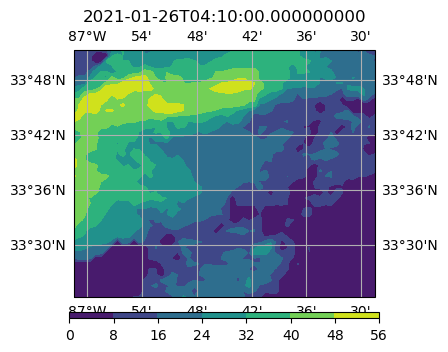

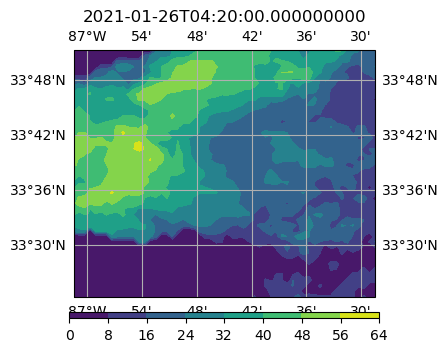

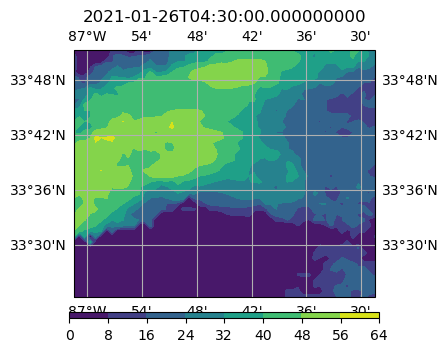

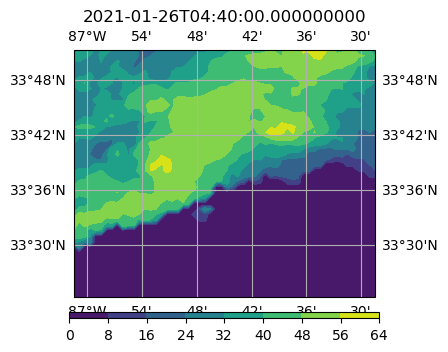

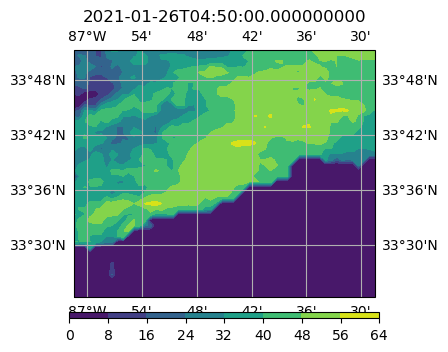

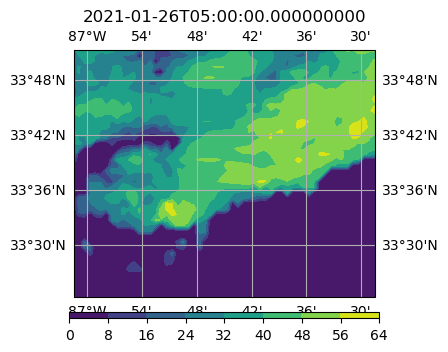

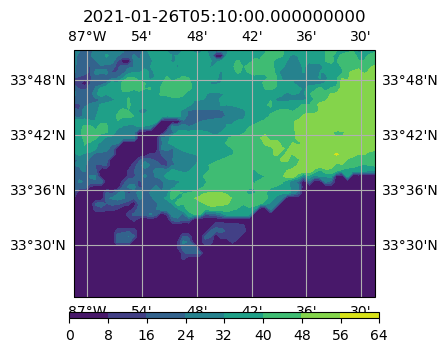

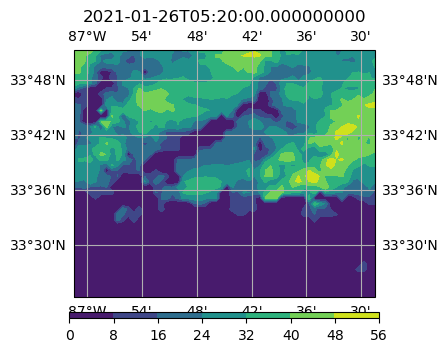

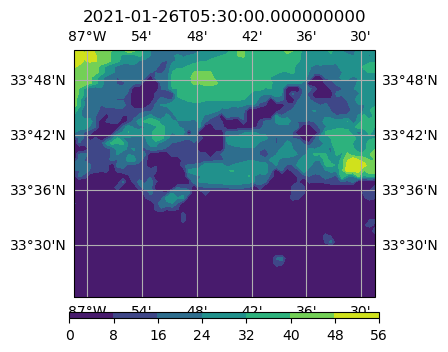

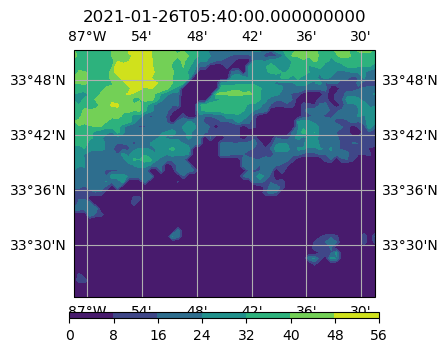

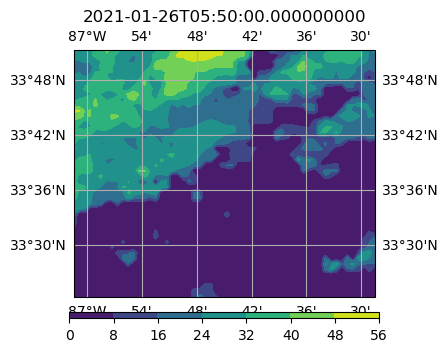

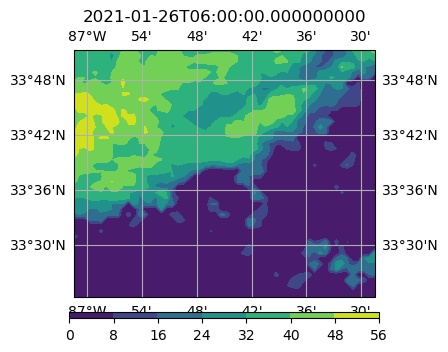

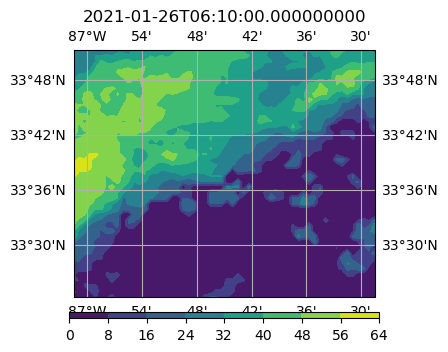

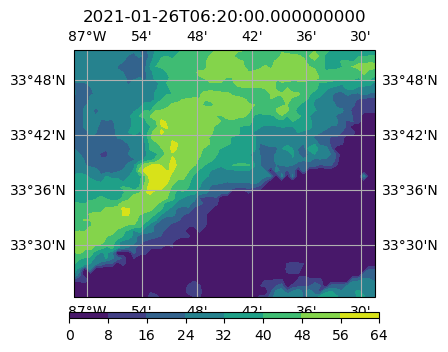

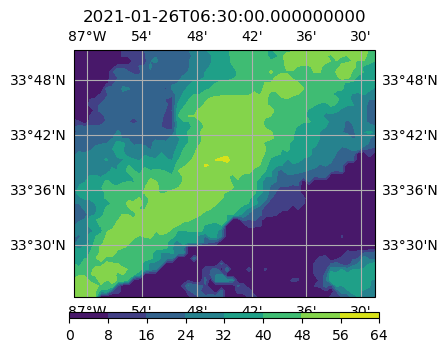

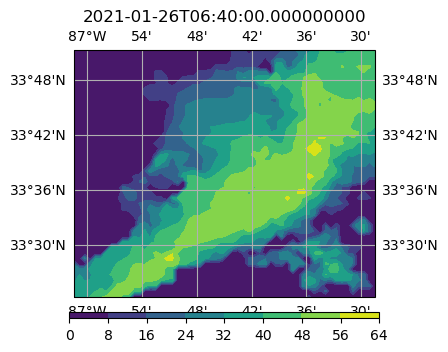

In [11]:
start = 0
var = xr_data['SHSR']
min_lat = np.amin(lats)
max_lat = np.amax(lats)
min_lon = np.amin(lons)
max_lon = np.amax(lons)   

for i in range(19):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    cf = ax.contourf(lon2d, lat2d, var[start+i], transform=ccrs.PlateCarree())
    cb = plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)
    plt.title( xr_data['time'][start+i].values )
    plt.show()

### Compute Gradients on a certain timeframe of SHSR data


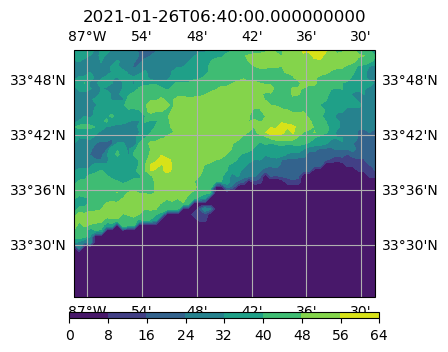

(19, 46, 56)
(46, 56)


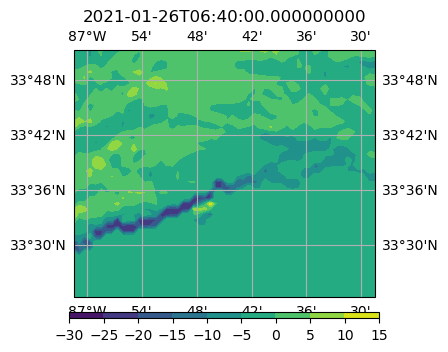

In [12]:
start = 0
var = xr_data['SHSR'].values 
min_lat = np.amin(lats)
max_lat = np.amax(lats)
min_lon = np.amin(lons)
max_lon = np.amax(lons)   

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
cf = ax.contourf(lon2d, lat2d, var[6], transform=ccrs.PlateCarree())
cb = plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)
plt.title( xr_data['time'][start+i].values )
plt.show()

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(var.shape)
grads = np.array( np.gradient(var[6], axis=0) )
print(grads.shape)
cf = ax.contourf(lon2d, lat2d, grads, transform=ccrs.PlateCarree())
cb = plt.colorbar(cf, orientation='horizontal', pad=0.05, aspect=50)
plt.title( xr_data['time'][start+i].values )
plt.show()